In [1]:
#Importar liberias
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

C:\Users\acer\AppData\Local\Temp\ipykernel_11068\2718804192.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv('casas.csv',sep=',')
print(df)

   Terreno (m2)  Precio (MDP)
0         440.0          1.01
1         616.0          1.42
2         381.0          0.88
3         963.0          2.21
4         431.0          0.99
5         255.0          0.59
6         594.0          1.37
7         625.0          1.44
8         708.0          1.63
9         468.0          1.08


In [3]:
x = df[['Terreno (m2)']].values
y = df['Precio (MDP)'].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, shuffle=True, random_state=0)
print ('X_train',x_train)
print ('X_test',x_test)
print ('y_train',y_train)
print ('y_test',y_test)

X_train [[468.]
 [616.]
 [594.]
 [625.]
 [963.]
 [440.]
 [255.]]
X_test [[381.]
 [708.]
 [431.]]
y_train [1.08 1.42 1.37 1.44 2.21 1.01 0.59]
y_test [0.88 1.63 0.99]


In [4]:
def bgd(x, y, w, a, iteraciones):
    m=len(x)
    for j in range (iteraciones):
        w[j]=w[j-1]
        suma=0
        for i in range(m):
            suma += (w[j]*x[i] - y[i])*x[i]
        w[j]=w[j] - 2*a*suma
    return w

#Función para calcular la y_pred
def y_pred(w, x):
    return x*w


#Funcion para calcular el error de estimacion
def error_estimacion(y, y_pred):
    error=0
    for i in range(len(y)):
        error += abs(y_pred[i] - y[i])
    return error

    

In [55]:
a = 0.0000001
iteraciones = 5
w = [0]*iteraciones
pesos = bgd(x_train, y_train, w, a, iteraciones)

for i in range(len(w)):
   print('w',i,':', pesos[i])

print('\ny_test:', y_test)
print('\n')

for i in range(len(pesos)):
   print('y_pred',i,':', y_pred(pesos[i], x_test))
   print('\n')


for i in range(len(pesos)):
   error = error_estimacion(y_test, y_pred(pesos[i], x_test))
   print('Error',i,':',error)  

w 0 : [0.0011634]
w 1 : [0.00173861]
w 2 : [0.00202299]
w 3 : [0.0021636]
w 4 : [0.00223312]

y_test: [0.88 1.63 0.99]


y_pred 0 : [[0.44325692]
 [0.82369003]
 [0.50142712]]


y_pred 1 : [[0.66240891]
 [1.23093309]
 [0.74933921]]


y_pred 2 : [[0.7707605 ]
 [1.43227935]
 [0.87191017]]


y_pred 3 : [[0.82433094]
 [1.53182756]
 [0.93251085]]


y_pred 4 : [[0.85081685]
 [1.58104549]
 [0.96247261]]


Error 0 : [1.73162592]
Error 1 : [0.85731879]
Error 2 : [0.42504997]
Error 3 : [0.21133065]
Error 4 : [0.10566504]


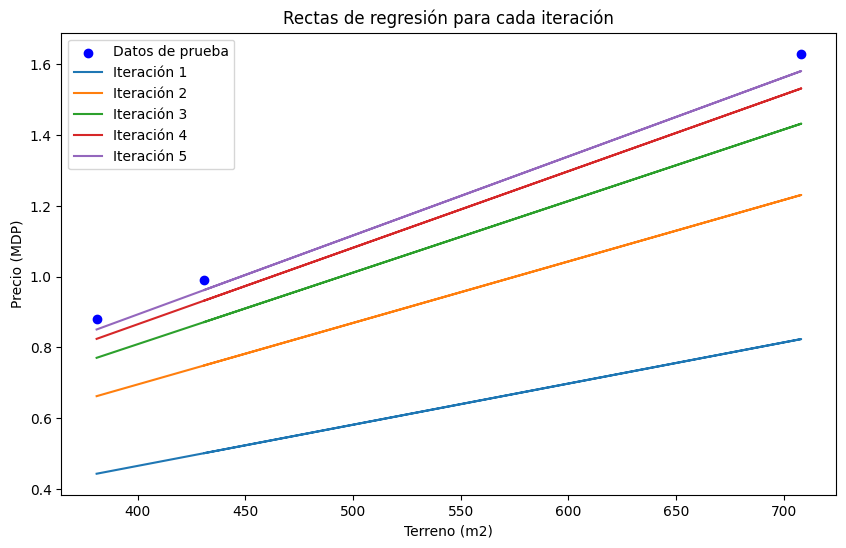

In [56]:
errores = []
for i in range(len(pesos)):
    errores.append(error_estimacion(y_test, y_pred(pesos[i], x_test)))

# Crear un gráfico de dispersión de los datos de prueba
plt.figure(figsize=(10, 6))
plt.scatter(x_test, y_test, color='blue', label='Datos de prueba')

# Graficar la recta de regresión para cada iteración
for i in range(len(pesos)):
    y_predic = y_pred(pesos[i], x_test)
    plt.plot(x_test, y_predic, label=f'Iteración {i+1}')

plt.title('Rectas de regresión para cada iteración')
plt.xlabel('Terreno (m2)')
plt.ylabel('Precio (MDP)')
plt.legend()
plt.show()


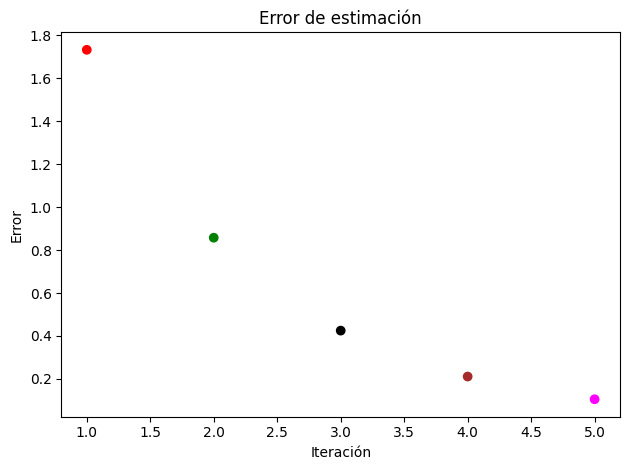

In [42]:
colores = ['red', 'green', 'black', 'brown', 'magenta']
plt.scatter(range(1, len(errores) + 1), errores, color=colores[:len(errores)])
plt.title('Error de estimación')
plt.xlabel('Iteración')
plt.ylabel('Error')

plt.tight_layout()
plt.show()